In [2]:
import matplotlib.pyplot as plt
import gensim
import numpy as np
import pandas as pd
import spacy
import pickle 

from gensim.models.wrappers.dtmmodel import DtmModel
from gensim.models import CoherenceModel, LdaModel, LsiModel, HdpModel
from gensim.models.wrappers import LdaMallet
from gensim.corpora import Dictionary, MmCorpus
import pyLDAvis.gensim

import os, re, operator, warnings
warnings.filterwarnings('ignore') 
%matplotlib inline

# LDA Communities topic models

In [3]:
PUA_model = LdaModel.load('./lda/PUA_lda_model.gensim')

In [4]:
PUA_model.print_topics(num_topics=10)

[(14,
  '0.084*"man" + 0.045*"woman" + 0.031*"love" + 0.019*"like" + 0.014*"tactic" + 0.012*"work" + 0.009*"video" + 0.009*"relationship" + 0.008*"want" + 0.008*"guy"'),
 (13,
  '0.023*"book" + 0.018*"woman" + 0.018*"girl" + 0.017*"like" + 0.016*"tell" + 0.015*"man" + 0.013*"slow" + 0.012*"sound_like" + 0.010*"recommend" + 0.010*"enjoy"'),
 (2,
  '0.018*"energy" + 0.014*"voice" + 0.013*"reminder" + 0.013*"find" + 0.012*"breakdown" + 0.011*"woman" + 0.011*"guy" + 0.011*"gold" + 0.011*"thank" + 0.010*"happy"'),
 (4,
  '0.044*"girl" + 0.020*"like" + 0.018*"time" + 0.016*"want" + 0.012*"tell" + 0.012*"lol" + 0.012*"talk" + 0.010*"meet" + 0.010*"think" + 0.009*"woman"'),
 (11,
  '0.057*"mindfulattraction_org" + 0.057*"coach_https" + 0.057*"coach_man" + 0.057*"dalexis_school" + 0.057*"course_dark" + 0.057*"patreon_patreon" + 0.057*"thinkific_com" + 0.057*"com_ma" + 0.057*"course_https" + 0.057*"free_access"'),
 (0,
  '0.033*"man" + 0.031*"thank" + 0.022*"video" + 0.017*"approach" + 0.016*"go

# DTM

* increase alpha for later analysis, since it seems to be small (0.01)

In [30]:
years = ['2016', '2017', '2018', '2019']

In [5]:
PUA_model = DtmModel.load("./lda/PUA_dtm.gensim")

In [26]:

PUA_model.show_topic(topicid=0, time=0, topn=10)

[(0.013447028660961367, 'ask'),
 (0.010625706327051718, 'time'),
 (0.009141171190827762, 'want'),
 (0.008032322798099149, 'create'),
 (0.007767167394102525, 'right'),
 (0.007338241723163541, 'attention'),
 (0.007125617489780176, 'good'),
 (0.006895193529774907, 'make'),
 (0.006753887731248107, 'live'),
 (0.006551699325976671, 'attraction')]

In [27]:
def dict_topic(model, topicid, topn=100):
    words_prob = dict()
    
    for i in range(4):
        for prob, word in model.show_topic(topicid=topicid, time=i, topn=topn):
            if word not in words_prob:
                words_prob[word] = [prob]
            else:
                words_prob[word].append(prob)
                
    return words_prob

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

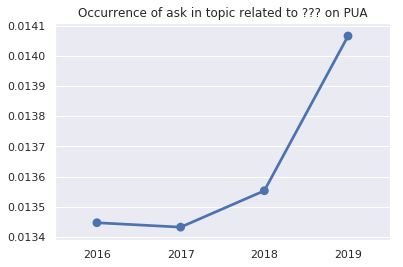

In [32]:
words_prob = dict_topic(PUA_model, 0)
word = 'ask'
plt.title(f"Occurrence of {word} in topic related to ??? on PUA")
sns.pointplot(years, words_prob[word]);